In [2]:
# Simple classification problem using the iris dataset. 
# The soruce code is partially copied from 'Hands-on Machine Learning with Scikit-Learn 
# and Tensorflow', chapter 10.



import tensorflow as tf
import pandas
import numpy as np 
import sklearn as sk
from sklearn.model_selection import train_test_split

In [3]:
data = pandas.read_csv("iris.csv")

In [4]:
X=data.T[:4].T.as_matrix()

In [5]:
Y=data.T[4:].T

In [6]:
#tf.one_hot(Y.as_matrix(),depth=3)
y=pandas.get_dummies(Y)
Xd=X
yd=y.as_matrix()
labels = np.argmax(yd, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)

In [7]:
from tensorflow.contrib.layers import fully_connected

Xvar = tf.placeholder(tf.float32, shape=(None, 4), name="Xvar")
yvar = tf.placeholder(tf.int64, shape=(None), name="yvar")
lr=0.01
with tf.name_scope("iris_dnn"):
    hidden1 = fully_connected(Xvar,10,  activation_fn=tf.nn.sigmoid)
    hidden2 = fully_connected(hidden1,5,activation_fn=tf.nn.sigmoid)
    logits= fully_connected(hidden2,3, activation_fn=tf.nn.softmax)
    
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels= yvar, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(lr)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("pred"):
    correct = tf.nn.in_top_k(logits,yvar,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver=tf.train.Saver()


# execution
n_epochs=1000
batch_size=8

tr_acc=[]
te_acc=[]
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(int(150.0/batch_size)):
            ind = np.random.permutation(len(X_train))[:batch_size]
            X_batch = X_train[ind]
            y_batch = y_train[ind]
            sess.run(training_op, feed_dict={Xvar:X_batch, yvar : y_batch})
        if epoch % 3 == 0:
            acc_train = accuracy.eval(feed_dict={Xvar: X_batch, yvar: y_batch})
            acc_test = accuracy.eval(feed_dict={Xvar: X_test, yvar: y_test})
            tr_acc.append(acc_train)
            te_acc.append(acc_test)
            print(epoch, "training acc: ",acc_train, "test acc: ",acc_test)
    save_path = saver.save(sess,"./irismodel.ckpt")

(0, 'training acc: ', 0.625, 'test acc: ', 0.38)
(3, 'training acc: ', 0.375, 'test acc: ', 0.38)
(6, 'training acc: ', 0.5, 'test acc: ', 0.38)
(9, 'training acc: ', 0.375, 'test acc: ', 0.38)
(12, 'training acc: ', 0.375, 'test acc: ', 0.38)
(15, 'training acc: ', 0.375, 'test acc: ', 0.38)
(18, 'training acc: ', 0.125, 'test acc: ', 0.38)
(21, 'training acc: ', 0.25, 'test acc: ', 0.38)
(24, 'training acc: ', 0.25, 'test acc: ', 0.38)
(27, 'training acc: ', 0.25, 'test acc: ', 0.38)
(30, 'training acc: ', 0.375, 'test acc: ', 0.38)
(33, 'training acc: ', 0.375, 'test acc: ', 0.38)
(36, 'training acc: ', 0.625, 'test acc: ', 0.38)
(39, 'training acc: ', 0.25, 'test acc: ', 0.5)
(42, 'training acc: ', 0.75, 'test acc: ', 0.28)
(45, 'training acc: ', 0.125, 'test acc: ', 0.28)
(48, 'training acc: ', 0.5, 'test acc: ', 0.28)
(51, 'training acc: ', 0.5, 'test acc: ', 0.28)
(54, 'training acc: ', 0.25, 'test acc: ', 0.28)
(57, 'training acc: ', 0.625, 'test acc: ', 0.28)
(60, 'training ac

(495, 'training acc: ', 0.875, 'test acc: ', 0.62)
(498, 'training acc: ', 0.625, 'test acc: ', 0.62)
(501, 'training acc: ', 0.625, 'test acc: ', 0.62)
(504, 'training acc: ', 1.0, 'test acc: ', 0.62)
(507, 'training acc: ', 0.75, 'test acc: ', 0.62)
(510, 'training acc: ', 0.625, 'test acc: ', 0.62)
(513, 'training acc: ', 0.625, 'test acc: ', 0.62)
(516, 'training acc: ', 0.875, 'test acc: ', 0.62)
(519, 'training acc: ', 0.875, 'test acc: ', 0.62)
(522, 'training acc: ', 0.5, 'test acc: ', 0.62)
(525, 'training acc: ', 0.625, 'test acc: ', 0.62)
(528, 'training acc: ', 0.625, 'test acc: ', 0.62)
(531, 'training acc: ', 0.875, 'test acc: ', 0.62)
(534, 'training acc: ', 0.625, 'test acc: ', 0.62)
(537, 'training acc: ', 0.75, 'test acc: ', 0.62)
(540, 'training acc: ', 1.0, 'test acc: ', 0.62)
(543, 'training acc: ', 0.75, 'test acc: ', 0.62)
(546, 'training acc: ', 0.75, 'test acc: ', 0.62)
(549, 'training acc: ', 0.75, 'test acc: ', 0.62)
(552, 'training acc: ', 0.625, 'test acc: 

In [8]:
import matplotlib.pyplot as plt

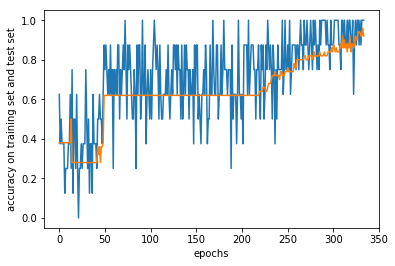

In [9]:
r = range(334)
plt.plot(r,tr_acc,r,te_acc)
plt.ylabel('accuracy on training set and test set')
plt.xlabel("epochs")
plt.show()